In [47]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.container { font-size:16px !important; }</style>"))

In [48]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib
font = {'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)

# Temporal coherence 

We are going to sketch some waves and then superpose them and numerically calculate the irradiance. Let's try ;) 

This is the sketch of the problem:

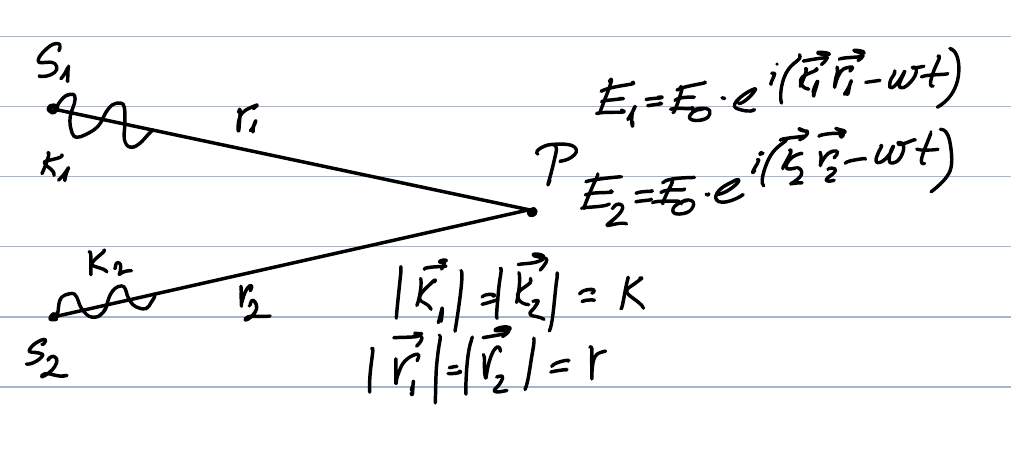

In [56]:
r = np.linspace(0,100,1001)
t = np.linspace(0,100,1001)
llambda = 1.0
T = 1.0
k = 2.*np.pi / llambda
omega = 2.*np.pi / T



In [57]:
E = np.cos(k*r[:,None] - omega*t[None,:])

Text(0, 0.5, 'time')

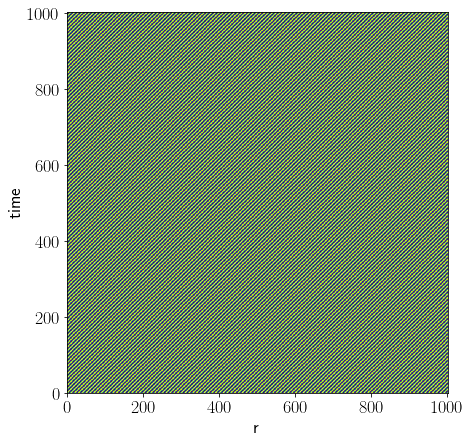

In [58]:
plt.figure(figsize=[10,7])
plt.imshow(E.T,origin='Lower')
plt.xlabel("r")
plt.ylabel("time")

In [62]:
# Define a limited wave: 
def pseudo_harmonic_wave(r,t,omega,k):
    E = np.cos(k*r[:,None] - omega*t[None,:])
    v = omega / k
    E1 = np.zeros([len(r),len(t)])
    got_wave = np.where((r[:,None] - v*t[None,:]) < 10.)
    E1[got_wave] = E[got_wave]
    E1[np.where(r[:,None]-v*t[None,:] < 0)] = 0.0
    return E1

Text(0, 0.5, 'time')

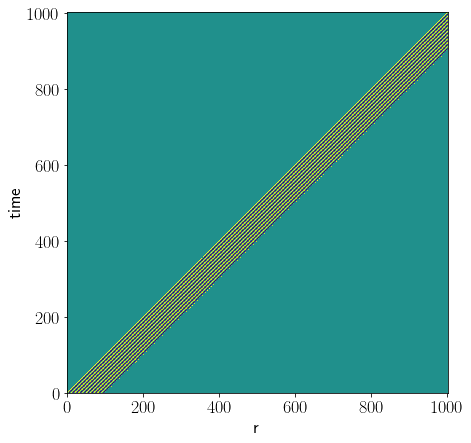

In [63]:
my_wave = pseudo_harmonic_wave(r,t,omega,k)
plt.figure(figsize=[10,7])
plt.imshow(my_wave.T,origin='Lower')
plt.xlabel("r")
plt.ylabel("time")

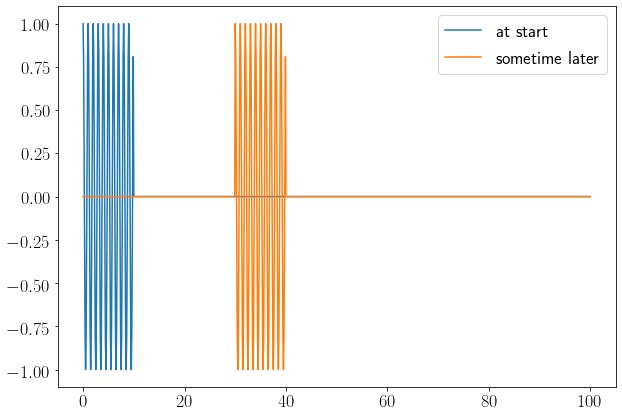

In [64]:
# Let's make sure it looks good when plotted:

plt.figure(figsize=[10,7])
plt.plot(r,my_wave[:,0],label='at start')
plt.plot(r,my_wave[:,300],label= 'sometime later')
plt.legend()


In [65]:
# Let's calculate the irradiance of this wave. How do we do that, well we temporaly average E^2 in one point. Say, the last one:
E_sq = my_wave[-1,:]**2.
t_step = t[1] - t[0]
t_total = t[-1] - t[0]
I = np.sum(E_sq) * t_step / t_total
print ("Irradiance is = ", I)

Irradiance is =  0.050000000000000135


Now, let's do the superposition between the two waves:

In [66]:
E1 = pseudo_harmonic_wave(r,t,omega,k)
E2 = pseudo_harmonic_wave(r,t,omega,k)

In [67]:
E_sq = (E1[-1,:] + E2[-1,:])**2.0
I_super = np.sum(E_sq) * t_step / t_total
print ("Irradiance for superposition of two waves is = ", I_super)
print ("Irradiance increases by a factor of: ", I_super/I)

Irradiance for superposition of two waves is =  0.20000000000000054
Irradiance increases by a factor of:  4.0


But now we want a lot of packets! 
Let's say they are separated by 13, time units

In [68]:
E1 = pseudo_harmonic_wave(r,t,omega,k) + pseudo_harmonic_wave(r,t-13,omega,k) + pseudo_harmonic_wave(r,t-26,omega,k)
E2 = pseudo_harmonic_wave(r,t,omega,k) + pseudo_harmonic_wave(r,t-13,omega,k) + pseudo_harmonic_wave(r,t-26,omega,k)

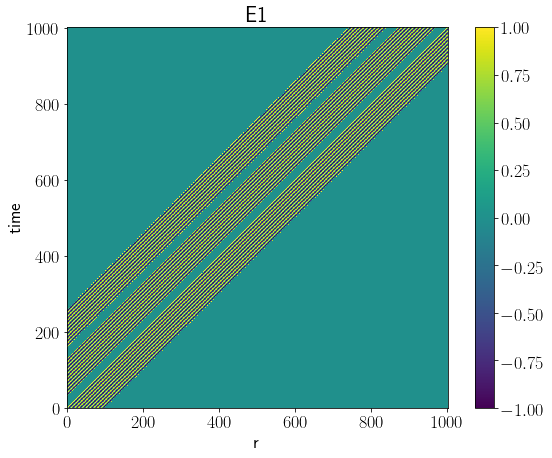

In [74]:
plt.figure(figsize=[10,7])
plt.imshow(E1.T,origin='Lower')
plt.xlabel("r")
plt.ylabel("time")
plt.title("E1")
plt.colorbar()

Text(0, 0.5, 'Electric field E1')

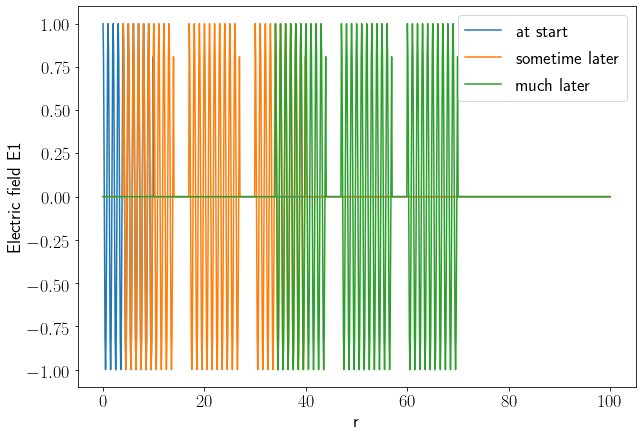

In [75]:
# Let's make sure it looks good when plotted:

plt.figure(figsize=[10,7])
plt.plot(r,E1[:,0],label='at start')
plt.plot(r,E1[:,300],label= 'sometime later')
plt.plot(r,E1[:,600],label= 'much later')

plt.legend()
plt.xlabel("r")
plt.ylabel("Electric field E1")

We need to extend the time ;) 

In [77]:
r = np.linspace(0,100,1001)
t = np.linspace(0,300,3001)
llambda = 1.0
T = 1.0
k = 2.*np.pi / llambda
omega = 2.*np.pi / T

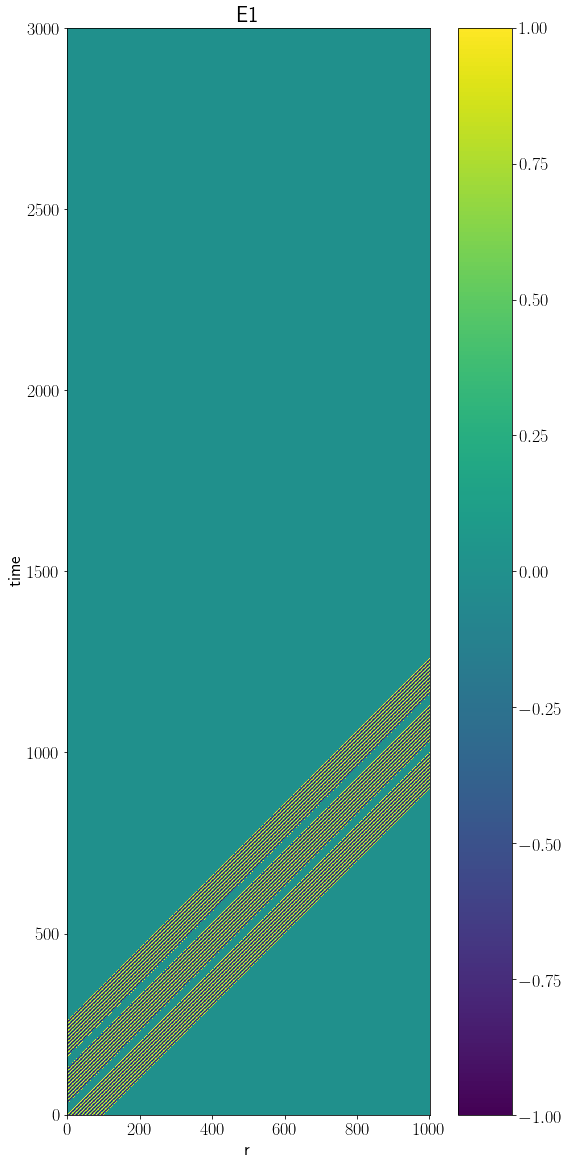

In [79]:
E1 = pseudo_harmonic_wave(r,t,omega,k) + pseudo_harmonic_wave(r,t-13,omega,k) + pseudo_harmonic_wave(x,t-26,omega,k)
E2 = pseudo_harmonic_wave(r,t,omega,k) + pseudo_harmonic_wave(r,t-13,omega,k) + pseudo_harmonic_wave(x,t-26,omega,k)
plt.figure(figsize=[10,20])
plt.imshow(E1.T,origin='Lower')
plt.xlabel("r")
plt.ylabel("time")
plt.title("E1")
plt.colorbar()

Average them in the same way:

In [80]:
t_step = t[1] - t[0]
t_total = t[-1] - t[0]

I_single = np.sum(E1[-1,:]**2.0)*t_step/t_total
I_super = np.sum((E1[-1,:]+E2[-1,:])**2.0)*t_step/t_total
print ("Irradiance for one wave = ", I_single)
print ("Irradiance for superposition of two waves is = ", I_super)
print ("Irradiance increases by a factor of: ", I_super/I_single)

Irradiance for one wave =  0.050000000000000135
Irradiance for superposition of two waves is =  0.20000000000000054
Irradiance increases by a factor of:  4.0


### No matter over how large time interval I do this. No matter how many packages are there. These are always going to interfere, and constructively. These two waves are perfectly coherent! 


And now finally introduce the random phase lag between them :)

In [81]:
def pseudo_harmonic_wave(r,t,omega,k,phi_0):
    
    E = np.cos(k*r[:,None] - omega*t[None,:] + phi_0)
    v = omega / k
    E1 = np.zeros([len(r),len(t)])
    got_wave = np.where((r[:,None] - v*t[None,:] < 10.))
    E1[got_wave] = E[got_wave]
    E1[np.where(r[:,None]-v*t[None,:] < 0)] = 0.0
    return E1

In [93]:
N_packets = 20

random_phase = np.random.uniform(-np.pi,np.pi,N_packets)
print (random_phase)

[ 2.64920965  1.84892614  1.53500778 -2.75805217  0.95005568 -0.68779826
  2.98449417 -0.46669968 -1.83680839  0.71641208  0.70472481  1.73359073
  1.73203856 -1.3224205  -2.8286502   0.9735711   1.99706427 -1.14976776
  0.72253702 -2.89002726]


In [94]:
E1 = pseudo_harmonic_wave(r,t,omega,k,0)
E2 = pseudo_harmonic_wave(r,t,omega,k,0)
for i in range(1,20):
    E1 += pseudo_harmonic_wave(x,t-i*13,omega,k,0)
    E2 += pseudo_harmonic_wave(x,t-i*13,omega,k,random_phase[i])

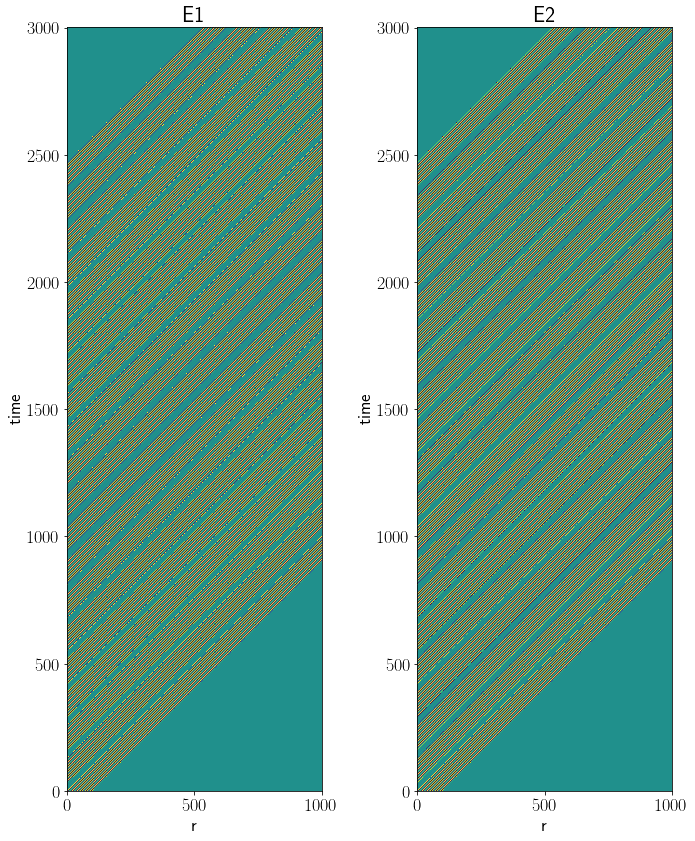

In [95]:
plt.figure(figsize=[10,20])
plt.subplot(121)
plt.imshow(E1.T,origin='Lower')
plt.xlabel("r")
plt.ylabel("time")
plt.title("E1")
plt.subplot(122)
plt.imshow(E2.T,origin='Lower')
plt.xlabel("r")
plt.ylabel("time")
plt.title("E2")
plt.tight_layout()

#plt.colorbar()

In [96]:
I_single = np.sum(E1[-1,:]**2.0)*t_step/t_total
I_super = np.sum((E1[-1,:]+E2[-1,:])**2.0)*t_step/t_total
print ("Irradiance for one wave = ", I_single)
print ("Irradiance for superposition of two waves is = ", I_super)
print ("Irradiance increases by a factor of: ", I_super/I_single)

Irradiance for one wave =  0.26999999999999735
Irradiance for superposition of two waves is =  0.5999345603718824
Irradiance increases by a factor of:  2.221979853229216


$I = I_1 + I_2 + 2\sqrt{I_1 I_2} \cos\delta (t) $ 

Text(0, 0.5, 'Superposition of the fields in point P')

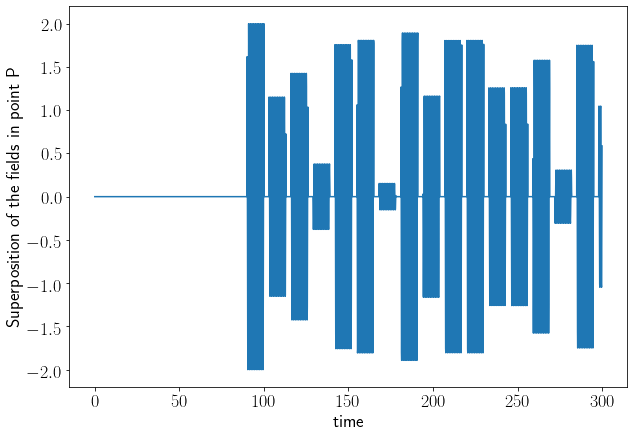

In [98]:
E_P = E1[-1,:] + E2[-1,:]
plt.figure(figsize=[10,7])
plt.plot(t,E_P)
plt.xlabel("time")
plt.ylabel("Superposition of the fields in point P")
#plt.xlim([90,100])